In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [98]:
df=pd.read_csv('HR_comma_sep.csv.txt')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [99]:
df.shape

(14999, 10)

In [100]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [101]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [102]:
df.drop_duplicates()
df.shape

(14999, 10)

In [103]:
df1=df.copy()


In [104]:
dummy_sales=pd.get_dummies(df['sales'])
dummy_salary=pd.get_dummies(df['salary'])


In [105]:
df.drop(columns=['sales','salary'],axis=1,inplace=True)
df=pd.merge(df,dummy_salary,left_index=True,right_index=True)
df=pd.merge(df,dummy_sales,left_index=True,right_index=True)
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [106]:
x=df.drop('left',axis=1)
y=df['left']
y.shape

(14999,)

In [107]:
scalar=StandardScaler()
x=scalar.fit_transform(x)

In [108]:
K=range(1,25)
k_scores=[]
for k in K:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9678000000000001, 0.9683993328885923, 0.9565319546364244, 0.9479976428730266, 0.9412636424282855, 0.9481305759395153, 0.9433967978652434, 0.9450635979541916, 0.9409964865465866, 0.9409965754947741, 0.9371963086502113, 0.9379962641761175, 0.9335959083833668, 0.9345291972426063, 0.9315289748721369, 0.9324624416277519, 0.9293288859239492, 0.9309290193462308, 0.9285955970647098, 0.9303956415388036, 0.9279953302201467, 0.9279955081165221, 0.9255286635534802, 0.9247953302201466]


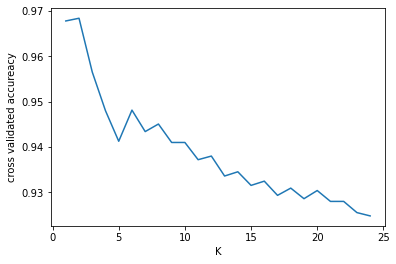

In [109]:
# Plot
plt.plot(K,k_scores)
plt.xlabel('K')
plt.ylabel('cross validated accureacy')
plt.show()


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=5)
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_pred)

[1 0 1 ... 0 0 0]
